Что нужно для первой практической работы

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

from IPython.display import Image

Взятие нужных колонок их таблицы. 

Обычно все данные для анализа хранятся в DataFrame - такая таблица с колонками разного типа. 

По умолчанию результат последней команды выводится на экран, поэтому здесь выводится таблица. 

Через print датафрейм не такой удобный, поэтому его так вывести лучше

In [28]:
df = pd.read_excel('first_practice_dataframe.xlsx')
# используем двойные скобки здесб. Одна скобка используется для выделение одной колонки, 
# а двойные для выделение колонок и создание датафрейма
df = df[['cat5_customerSatisfaction', 'cat1_gender', 'num1_10', 'num2_10', 'num3_10']]
df

,cat5_customerSatisfaction,cat1_gender,num1_10,num2_10,num3_10
0,good,male,1952.951114,-14.984191,
1,Good,male,248.952820,15.251861,624.089
2,Good,male,465.578792,72.069553,-
3,Very good,NaN,746.798307,-61.282697,702.582
4,Very good,male,-92.649660,11.401243,738.488
...,...,...,...,...,...
995,Neutral,male,-1239.039630,49.175988,729.443
996,Neutral,male,-313.300265,129.241360,631.932
997,poor,male,898.772621,3.237211,612.758
998,Good,NaN,-484.127869,23.486792,486.161


С помощью метода describe мы можем получить статистические характеристики численных переменных (интересно, почему num3_10 не отображается здесь...)

In [29]:
df.describe()

,num1_10,num2_10
count,1000.000000,952.000000
mean,-348.262016,-0.416448
std,2363.300870,44.123403
min,-9999.000000,-140.129425
25%,-548.516962,-27.246439
50%,86.667447,-1.601830
75%,682.738284,26.391433
max,3172.179061,138.457461


Теперь возьмем учебный пример и будем его рассматривать.

Колонки v1 и v2 предполагаются численными, а v3 - категориальными

In [30]:
values = {
    'v1': [1, 2, 3, None, None, '-', 7, '2'],
    'v2': [1,4, 1, 2, 4, 6, 3, None],
    'v3': ["s1", "S1", "S2", None, "S2", -9999, '-', 's1']
}
df = pd.DataFrame(values)
df

,v1,v2,v3
0,1,1.0,s1
1,2,4.0,S1
2,3,1.0,S2
3,None,2.0,None
4,None,4.0,S2
5,-,6.0,-9999
6,7,3.0,-
7,2,NaN,s1


Обратите внимание, что колнка v2 имеет пропуск NaN, а не None. Это от того, что она численного типа.

Методом info мы можем узнать названия колонок, их тип и другую информацию. 

Например, можем увидеть, что v1 имеет тип object, а не числовой и категориальной, об этом стоит задуматься.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      6 non-null      object 
 1   v2      7 non-null      float64
 2   v3      7 non-null      object 
dtypes: float64(1), object(2)
memory usage: 320.0+ bytes


Заменяем пропуски на None. 

Часто пропуски имеют форму пустых строк, -, -9999. 

Первый случай Pandas умеет распознавать сам, а остальные мы должны сами заменять вручную

In [32]:
# метод replace не изменяет оригинальный датафрейм, поэтому сами меняем колонку
df['v3'] = df['v3'].replace({'s1': 'S1'})
df['v3'] = df['v3'].replace({-9999: None}) 
df['v3'] = df['v3'].replace({'-': None})
df['v1'] = df['v1'].replace({'-': None})
df['v2'] = df['v2'].astype('category')
df

,v1,v2,v3
0,1,1.0,S1
1,2,4.0,S1
2,3,1.0,S2
3,None,2.0,None
4,None,4.0,S2
5,None,6.0,None
6,7,3.0,None
7,2,NaN,S1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   v1      5 non-null      object  
 1   v2      7 non-null      category
 2   v3      5 non-null      object  
dtypes: category(1), object(2)
memory usage: 464.0+ bytes


Тоже самое относится и первой колонки, она не типа float или int. Все дело в минусе вместо пропуска.

In [34]:
df['v1'] = df['v1'].replace({'-': np.nan})
df['v1'] = df['v1'].astype('float')
df['v2'] = df['v2'].astype('float')
df

,v1,v2,v3
0,1.0,1.0,S1
1,2.0,4.0,S1
2,3.0,1.0,S2
3,NaN,2.0,None
4,NaN,4.0,S2
5,NaN,6.0,None
6,7.0,3.0,None
7,2.0,NaN,S1


In [35]:
df.describe()

,v1,v2
count,5.000000,7.000000
mean,3.000000,3.000000
std,2.345208,1.825742
min,1.000000,1.000000
25%,2.000000,1.500000
50%,2.000000,3.000000
75%,3.000000,4.000000
max,7.000000,6.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      5 non-null      float64
 1   v2      7 non-null      float64
 2   v3      5 non-null      object 
dtypes: float64(2), object(1)
memory usage: 320.0+ bytes


Мы можем посмотреть пропуски здесь, но если данных много (а как правило их много), мы можем посмотреть на информацию о датафрейме как мы сделали выше

Теперь визуализируем данные. Начнем со столбчатой и круговой диаграммы

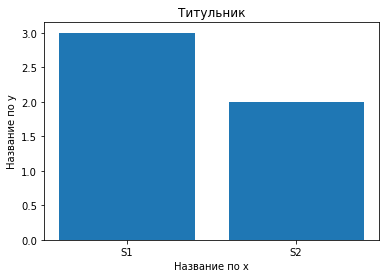

In [9]:
counts = Counter(df['v3'].dropna()) # dropna() - с помощью этой функции мы убираем пропуски, чтоб они не мешались
                                    # если мы не заменим '-' и т.д. на None вручную, этот шаг не будет выполняться
plt.bar(counts.keys(), counts.values())
plt.title('Титульник')
plt.xlabel('Название по x')
plt.ylabel('Название по y')
plt.show()

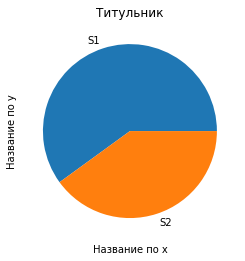

In [10]:
plt.pie(counts.values(), labels=counts.keys())
plt.title('Титульник')
plt.xlabel('Название по x')
plt.ylabel('Название по y')

plt.show()

Теперь порисуем диаграммы для численных переменных. 

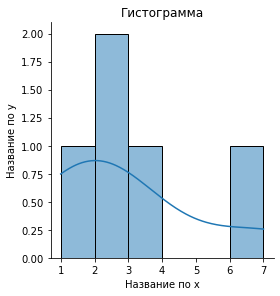

In [11]:
sns.displot(df['v1'], kde=True, height=4) # с помощью height можем указывать высоту графика
plt.title('Гистограмма')
plt.xlabel('Название по x')
plt.ylabel('Название по y')
plt.show()

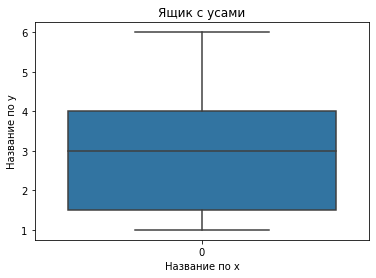

In [12]:
sns.boxplot(data=df['v2'])
plt.title('Ящик с усами')
plt.xlabel('Название по x')
plt.ylabel('Название по y')
plt.show() # по умолчанию рисуется горизонтальный, но и ладно

Отрисовка графиков занимает довольно много кода, было бы неплохо заменить это функцией, да?

## Преобразование данных

Метод kNN (k ближайших соседей) чувствителен к расстоянию, так как он работает с помощью него. 

Допустим, у нас первая колонка изменяется от 0 до 2, а другая от 0 до 200. 

И мы имеем две точки (0, 0) и (1, 100). 

Если мы посчитаем расстояние между ними, то оно будет равно sqrt((0-1)^2 + (0 - 100)^2). 

В итоге вклад расстояний первой переменной мизерный по сравнению со второй, 
но по соотношению точка находится по середине обоих осей. 
В итоге, чтоб все было корректно, мы отшкалируем значения переменных таким образом, 
чтоб минимум обоих был равен 0, а максимум 1. Если мы так сделаем, то у нас в итоге 
у точек будут координаты (0, 0) и (0.5, 0.5), и тогда вклад обоих переменных в расстояние будет одинаковый

In [13]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[['v1', 'v2']])
df[['v1_scaled', 'v2_scaled']] = scaled_values

In [14]:
df

,v1,v2,v3,v1_scaled,v2_scaled
0,1.0,1.0,S1,0.000000,0.0
1,2.0,4.0,S1,0.166667,0.6
2,3.0,1.0,S2,0.333333,0.0
3,NaN,2.0,None,NaN,0.2
4,NaN,4.0,S2,NaN,0.6
5,NaN,6.0,None,NaN,1.0
6,7.0,3.0,None,1.000000,0.4
7,2.0,NaN,S1,0.166667,NaN


Пока работаем дальше со шкалированными колонками

### Заполнение пропусков

Попробуем заполнить пропуски с помощью knn.


Тут мы хотим заполнить столбец v1_scaled. Колонку v3_scaled пока отбросим, так как с ней необходимо еще сделать манипуляции. 

По умолчанию KNNImputer заполняет весь датафрейм, который ему подается на вход. 

Поэтому после заполнения мы вернем обратно только столбец V1.

In [15]:
df_copy = df.copy()          # копируем датафрейм, чтоб сохранить значение колонок до заполнения
knn_imputer = KNNImputer()
inputed_df = knn_imputer.fit_transform(df_copy[['v1_scaled', 'v2_scaled']])
df['v1_scaled'] = inputed_df[:, 0] # нулевая колонка у нас v1_scaled, которую и хотим заполнить
df

,v1,v2,v3,v1_scaled,v2_scaled
0,1.0,1.0,S1,0.000000,0.0
1,2.0,4.0,S1,0.166667,0.6
2,3.0,1.0,S2,0.333333,0.0
3,NaN,2.0,None,0.333333,0.2
4,NaN,4.0,S2,0.333333,0.6
5,NaN,6.0,None,0.333333,1.0
6,7.0,3.0,None,1.000000,0.4
7,2.0,NaN,S1,0.166667,NaN


Нотация inputed_df[:, 0] означает, что мы берем все элементы первого столбца.
inputed_df не является датафреймом, поэтому мы используем стандартную нотацию Python

In [ ]:
inputed_df[:, 0]

Заполним пропуски с помощью медианы

In [16]:
df['v2_scaled'].fillna(np.median(df['v2_scaled'].dropna()), inplace=True)
df

,v1,v2,v3,v1_scaled,v2_scaled
0,1.0,1.0,S1,0.000000,0.0
1,2.0,4.0,S1,0.166667,0.6
2,3.0,1.0,S2,0.333333,0.0
3,NaN,2.0,None,0.333333,0.2
4,NaN,4.0,S2,0.333333,0.6
5,NaN,6.0,None,0.333333,1.0
6,7.0,3.0,None,1.000000,0.4
7,2.0,NaN,S1,0.166667,0.4


Заполним категориальную переменную самым популярным значением

In [17]:
data = Counter(df['v3'].dropna())
mode = data.most_common(1)[0][0]
df['v3'].fillna(mode, inplace=True)
df

,v1,v2,v3,v1_scaled,v2_scaled
0,1.0,1.0,S1,0.000000,0.0
1,2.0,4.0,S1,0.166667,0.6
2,3.0,1.0,S2,0.333333,0.0
3,NaN,2.0,S1,0.333333,0.2
4,NaN,4.0,S2,0.333333,0.6
5,NaN,6.0,S1,0.333333,1.0
6,7.0,3.0,S1,1.000000,0.4
7,2.0,NaN,S1,0.166667,0.4


## Преобразование данных

Мы можем использовать LabelEncoder для label кодирования категориальных переменных.

In [18]:
le = LabelEncoder()
df['V3_lb'] = le.fit_transform(df['v3'])
df

,v1,v2,v3,v1_scaled,v2_scaled,V3_lb
0,1.0,1.0,S1,0.000000,0.0,0
1,2.0,4.0,S1,0.166667,0.6,0
2,3.0,1.0,S2,0.333333,0.0,1
3,NaN,2.0,S1,0.333333,0.2,0
4,NaN,4.0,S2,0.333333,0.6,1
5,NaN,6.0,S1,0.333333,1.0,0
6,7.0,3.0,S1,1.000000,0.4,0
7,2.0,NaN,S1,0.166667,0.4,0


А вот так мы можем декодировать переменную

In [19]:
le.inverse_transform(df['V3_lb'])

array(['S1', 'S1', 'S2', 'S1', 'S2', 'S1', 'S1', 'S1'], dtype=object)

Точно также с one-hot кодированием

In [20]:
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(df[['v3']]).toarray())
df = df.join(enc_df)
df

,v1,v2,v3,v1_scaled,v2_scaled,V3_lb,0,1
0,1.0,1.0,S1,0.000000,0.0,0,1.0,0.0
1,2.0,4.0,S1,0.166667,0.6,0,1.0,0.0
2,3.0,1.0,S2,0.333333,0.0,1,0.0,1.0
3,NaN,2.0,S1,0.333333,0.2,0,1.0,0.0
4,NaN,4.0,S2,0.333333,0.6,1,0.0,1.0
5,NaN,6.0,S1,0.333333,1.0,0,1.0,0.0
6,7.0,3.0,S1,1.000000,0.4,0,1.0,0.0
7,2.0,NaN,S1,0.166667,0.4,0,1.0,0.0


А вот так мы можем декодировать переменную

In [21]:
enc.inverse_transform(df.iloc[:, -2:])

array([['S1'],
       ['S1'],
       ['S2'],
       ['S1'],
       ['S2'],
       ['S1'],
       ['S1'],
       ['S1']], dtype=object)

### Заполнение категориального признака

Для того, чтоб заполнить пропуски для столбца v3, нам нужно провести некоторые манипуляции.

По умолчанию KNNImputer, к сожалению, не принимает категориальные переменные, он там ошибку выдает.

Поэтому сначала мы должны эту категориальную переменную кодировать с помощью one-hot encoding (шаг 1). 

У нас тогда появится колонка, которая показывает, что в этой строке пропуск. 

Далее мы в строках с пропусками заменяем другие фиктивные значения на none, чтоб указать, что это пропуск.

На шаге 3 отбрасываем первую колонку, которая отображает пропуски, и запускаем knn imputer на категориальной переменной и на численных. 

После этого на шаге 4 смотрим у какой колонки максимальное значение и присваиваем ей 1, а другим 0. 

Далее обратно декодируем и вот мы заполнили пропуски, шаг 5. 

Не забудьте, что knn очень чувствителен к расстояниям, поэтому переменные сначала необходимо привести значениям от 0 до 1. 

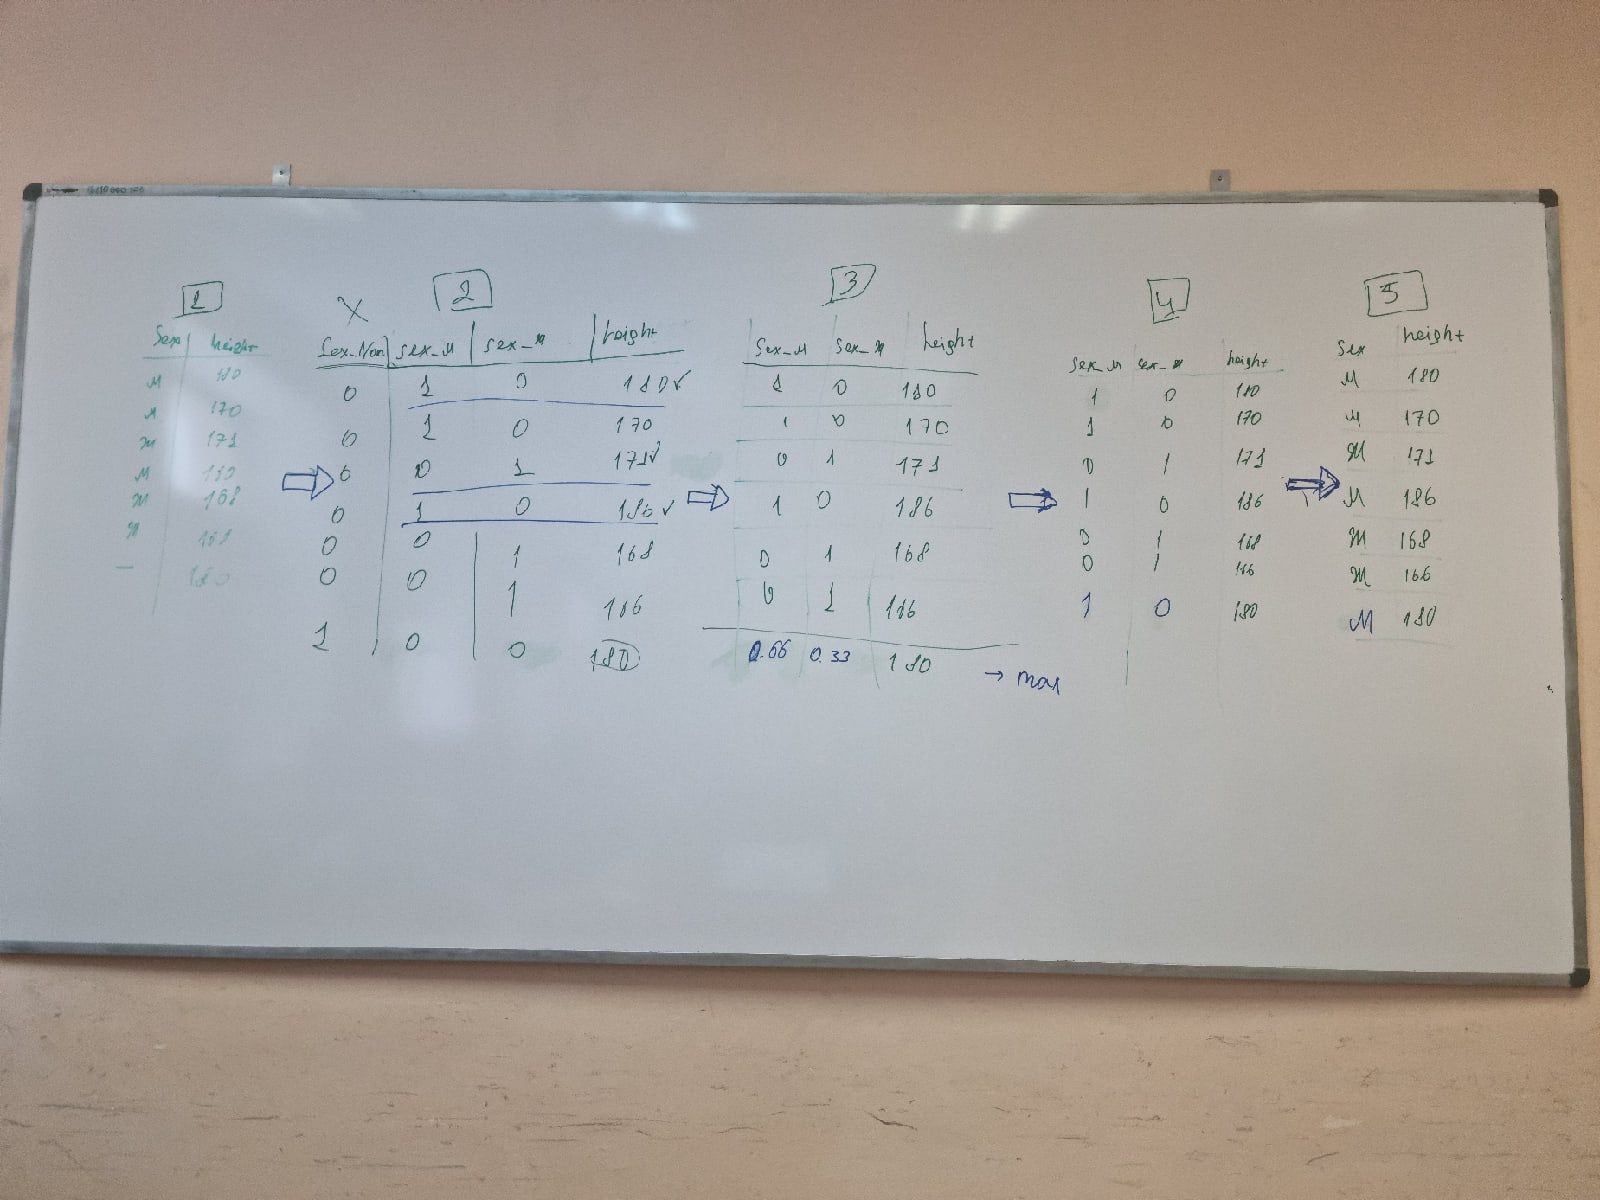

In [22]:
Image(filename='how_to_fill_category.jpg')

Итого, алгоритм выполнения первой практической работы.

1. Исследуем описание датафрейма.
2. Заменяем пропущенные значения на None.
3. Рисуем графики до обработки.
4. Обрабатываем выбросы. Убираем выбросы до заполнения пропусков, чтоб они не влияли на заполнение пропусков.
5. Делаем заполнение пропусков. сначала заполняем с помощью knn, а только потом с помощью статистик. Это нужно для того, чтоб заполнение статистиками не влияло на то, как заполняется knn. 
6. Рисуем обновленные графики с теми же переменными, что и на 3 шаге.
6. Делаем label-coding.
7. Добавляем стандартизацию численных переменных.